In [1]:
# Sources:
#  Learning SimpleITK: https://github.com/InsightSoftwareConsortium/SimpleITK-Notebooks/tree/master/Python


# List files (training {normal,peumonia}, testing)

In [2]:
import os
from glob import glob

CUR_DIR = os.getcwd()

PIC_DIR = f'{CUR_DIR}/chest-xray-pneumonia/chest_xray/chest_xray/'
assert os.path.exists(PIC_DIR), f'missing folder {PIC_DIR}'

get_jpeg = lambda path: glob(f'{path}/*.jpeg')

train_normal_files = get_jpeg(f'{PIC_DIR}/train/NORMAL/')
train_pneumo_files =  get_jpeg(f'{PIC_DIR}/train/PNEUMONIA/')

test_normal_files = get_jpeg(f'{PIC_DIR}/test/NORMAL/')
test_pneumo_files =  get_jpeg(f'{PIC_DIR}/test/PNEUMONIA/')

names = ('train_normal_files', 'train_pneumo_files', 'test_normal_files', 'test_pneumo_files')
sets = (train_normal_files, train_pneumo_files, test_normal_files, test_pneumo_files)

for name, files in zip(names, sets):
    print(name, len(files))

train_normal_files 1341
train_pneumo_files 3875
test_normal_files 234
test_pneumo_files 390


# Checking Width/Height/Dim of each image

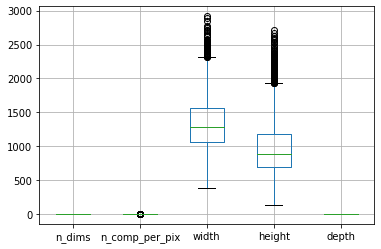

       n_dims  n_comp_per_pix        width       height   depth
count  5840.0     5840.000000  5840.000000  5840.000000  5840.0
mean      2.0        1.096918  1327.825000   970.600685     0.0
std       0.0        0.429505   363.764314   383.681911     0.0
min       2.0        1.000000   384.000000   127.000000     0.0
25%       2.0        1.000000  1056.000000   688.000000     0.0
50%       2.0        1.000000  1281.000000   886.000000     0.0
75%       2.0        1.000000  1560.000000  1187.000000     0.0
max       2.0        3.000000  2916.000000  2713.000000     0.0


In [31]:
import SimpleITK as sitk
from pandas import DataFrame
import matplotlib.pyplot as plt

# Checking dimensions of images
records = []
for name, pics in zip(names, sets):
    tp = {'name': name}
    for pic in pics:
        img = sitk.ReadImage(pic)
        tp['fname'] = pic
        tp['n_dims'] = img.GetDimension()
        tp['n_comp_per_pix'] = img.GetNumberOfComponentsPerPixel()
        tp['width'] = img.GetWidth()
        tp['height'] = img.GetHeight()
        tp['depth'] = img.GetDepth()
        tp['spacing'] = img.GetSpacing()
        records.append(tp.copy())

df = DataFrame.from_records(records)
df.boxplot()
plt.show()
print(df.describe())

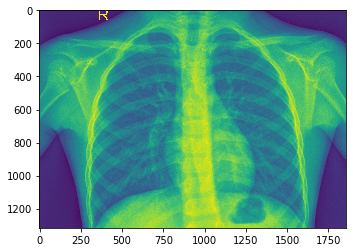

In [35]:
# Resize is needed
# sitk.WriteImage(img, os.path.join(OUTPUT_DIR, 'SimpleITK.png'))
import matplotlib.pyplot as plt
plt.imshow(plt.imread(train_normal_files[0]))

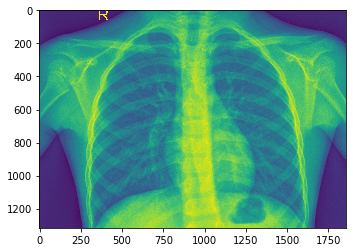

In [36]:
plt.imshow(plt.imread(test_normal_files[0]))

In [37]:
from keras.applications.inception_v3 import InceptionV3

Using TensorFlow backend.


In [40]:
model = InceptionV3()

W0921 18:40:37.408756  9304 deprecation_wrapper.py:119] From C:\Users\Admin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0921 18:40:37.418729  9304 deprecation_wrapper.py:119] From C:\Users\Admin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0921 18:40:37.421721  9304 deprecation_wrapper.py:119] From C:\Users\Admin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0921 18:40:37.435712  9304 deprecation_wrapper.py:119] From C:\Users\Admin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0921 18:40:37.436701  9304 deprecation_wrapper.py:119] 

96116736/96112376 [==============================] - 18s 0us/step


In [42]:
dir(model)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_inbound_node',
 '_base_init',
 '_built',
 '_check_trainable_weights_consistency',
 '_compute_previous_mask',
 '_expects_training_arg',
 '_feed_input_names',
 '_feed_input_shapes',
 '_feed_inputs',
 '_get_node_attribute_at_index',
 '_inbound_nodes',
 '_init_graph_network',
 '_init_subclassed_network',
 '_initial_weights',
 '_input_coordinates',
 '_input_layers',
 '_is_compiled',
 '_is_graph_network',
 '_layers',
 '_layers_by_depth',
 '_losses',
 '_make_predict_function',
 '_make_test_function',
 '_make_train_function',
 '_network_nodes',
 '_node_key',
 '_nodes_by_depth',

In [1]:
import sys
import os
import argparse

import random

import time
import datetime

from collections import Counter

import numpy as np
import pandas as pd

import shutil
from tqdm import tqdm

import inspect
import gc

import re

from PIL import Image
import cv2

import keras

from keras.utils import np_utils

from keras.preprocessing.image import ImageDataGenerator

from keras import models
from keras.models import Model
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, GlobalAveragePooling1D, GlobalAveragePooling2D, Flatten, BatchNormalization, Dense


from keras.applications.inception_v3 import InceptionV3


from keras.constraints import maxnorm


from keras import optimizers
from keras.optimizers import Adam, SGD , RMSprop


from keras import backend as K
K.set_image_dim_ordering('th')


from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau

from keras.wrappers.scikit_learn import KerasClassifier


from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report


from mlxtend.plotting import plot_confusion_matrix

import tensorflow as tf



from IPython.display import display

import seaborn as sns

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

ModuleNotFoundError: No module named 'tqdm'